# Колебательные химические реакции в системах с переносом

Научимся считать брюсселятор без переноса $(V_1 = V_2 = 0)$.
<br>
Когда $B < A^2 - 2A + 1$, особая точка является узлом.
<br>
Затем она становится устойчивым фокусом. 
<br>
При $B = A^2 + 1$ устойчивый фокус становится неустойчивым (бифуркация Хопфа). Аттрактором системы становится предельный цикл.

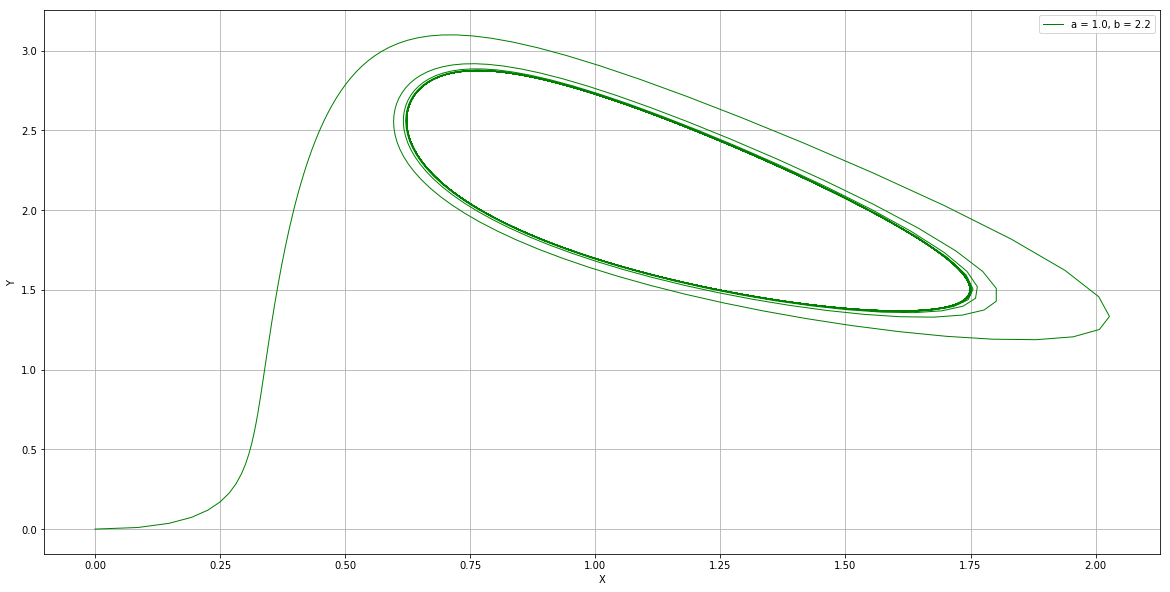

In [88]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import pi

a = 1.
b = 2.2

def f(y, t):             
    y1 = y[0]
    y2 = y[1]
    return [a-(b+1)*y1+(y1**2)*y2, b*y1-(y1**2)*y2]

t = np.linspace(0,100,1001)
y0 = [0.,0.]
[x,y] = odeint(f, y0, t).T

plt.figure(figsize = (20,10))
plt.plot(x, y, linewidth = 1, color = 'green', label='a = %s, b = %s'%(a, b))
plt.xlabel('X')
plt.ylabel('Y')
#plt.figure(figsize = (20,10))
#plt.plot(t, x)
#plt.xlabel('t')
#plt.ylabel('x')
#plt.xlim(0,10)
plt.legend(loc = 'best')
plt.grid()
plt.show()
#print "Значения x: {}".format(x[1:10])
#print "Значения y: {}".format(y[1:10])

## Научимся решать уравнение переноса вида $ \frac{\partial U}{\partial t} + c \frac{\partial U}{\partial x} = 0 $
## Начальные и граничные условия: $U(0,x) = U_0, U(t,0) = U(t,l)$ 


In [89]:
def f1(x,y):
    return x - (x**2 + y**2)*(x - y)
#    return a - (b+1)*x + (x**2)*y

def f2(x,y):
    return y - (x**2 + y**2)*(x + y)
#    return b*x - (x**2)*y

def fillValues(x, size, Step):
    x.append(0)
    for i in range(size - 1):
        x.append(x[i] + Step)

def minmod(a,b):
    if a*b <= 0:
        return 0
    elif (a > 0) and (b > 0):
        return min(a, b)
    elif (a < 0) and (b < 0):
        return max(a, b)
    
def maxmod(a,b):
    if a*b <= 0:
        return 0
    elif (a > 0) and (b > 0):
        return max(a, b)
    elif (a < 0) and (b < 0):
        return min(a, b)
    
def g(x,y,z):
    #Ограничитель superbee
    return maxmod(minmod(2*(z-y), y-x), minmod(z-y, 2*(y-x)))
    #Ограничитель ван Лира
    #return ((y-x)*abs(z-y) + (z-y)*abs(y-x))/(abs(z-y) + abs(y-x) + 10**(-14))
    #Ограничитель ван Альбада
    #return (z-x)*max(0,(z-y)*(y-x))/((z-y)**2 + (y-x)**2 + 10**(-14))

def G1(a,b,c,d):
    return g(a, b, c) - g(d, a, b)

def U0(x): 
    return np.cos(2*pi*x/L)
    #return np.cos(x)

def V0(x):
    return np.sin(2*pi*x/L)
    #return np.sin(x)
c1 = 1.0
c2 = 1.0
L = 10.
T = 200.
xStep = 0.05
tau = 0.02
gridWidth = int(L/xStep)
gridHeight = int(T/tau)
#gridWidth = 240
#gridHeight = 10000
#xStep = L/gridWidth
#tau = T/gridHeight 
Q1 = c1*tau/xStep
Q2 = c2*tau/xStep

if (Q1 < 1) and (Q2 < 1):
    print("ЕСТЬ СХОДИМОСТЬ")
else:
    print("НЕТ СХОДИМОСТИ")
print Q1, Q2, gridWidth, gridHeight

ЕСТЬ СХОДИМОСТЬ
0.4 0.4 200 10000


## Заполним массив значений x и t 

In [90]:
x =[]
t = []

fillValues(x, gridWidth, xStep)
fillValues(t, gridHeight, tau)

## Заполним массив значений сеточной функции в соответствии с начальными и граничными условиями

In [4]:
#U = np.zeros((gridWidth,gridHeight))
#V = np.zeros((gridWidth, gridHeight))

#for i in range(gridWidth):
#    U[i,0] = U0(x[i])
#    V[i,0] = V0(x[i])

## Начнем заполнять массив значений сеточной функции, пользуясь выбранной разностной схемой (TVD-схема с ограничителем superbee)

In [5]:
# Ограничитель superbee
#for j in range(gridHeight - 1):
#    for i in range(2, gridWidth - 1):
#        U[i,j+1] = (1 - Q1)*U[i,j] + Q1*U[i - 1,j] + Q1*(Q1-1)/2*G1(U[i-1,j], U[i,j], U[i+1,j], U[i-2,j])
#        V[i,j+1] = (1 - Q2)*V[i,j] + Q2*V[i - 1,j] + Q2*(Q2-1)/2*G1(V[i-1,j], V[i,j], V[i+1,j], V[i-2,j])
#    U[gridWidth-1,j+1] = (1 - Q1)*U[gridWidth-1,j] + Q1*U[gridWidth-2,j] + Q1*(Q1-1)/2*G1(U[gridWidth-2,j], U[gridWidth-1,j], U[0,j], U[gridWidth-3,j])
#    V[gridWidth-1,j+1] = (1 - Q2)*V[gridWidth-1,j] + Q2*V[gridWidth-2,j] + Q2*(Q2-1)/2*G1(V[gridWidth-2,j], V[gridWidth-1,j], V[0,j], V[gridWidth-3,j])
#    U[0,j+1] = (1 - Q1)*U[0,j] + Q1*U[-1,j] + Q1*(Q1-1)/2*G1(U[-1,j], U[0,j], U[1,j], U[-2,j])
#    U[1,j+1] = (1 - Q1)*U[1,j] + Q1*U[0,j] + Q1*(Q1-1)/2*G1(U[0,j], U[1,j], U[2,j], U[-1,j])
#    V[0,j+1] = (1 - Q2)*V[0,j] + Q2*V[-1,j] + Q2*(Q2-1)/2*G1(V[-1,j], V[0,j], V[1,j], V[-2,j])
#    V[1,j+1] = (1 - Q2)*V[1,j] + Q2*V[0,j] + Q2*(Q2-1)/2*G1(V[0,j], V[1,j], V[2,j], V[-1,j])

## Нарисуем картинку (зависимость U(x, t))

In [6]:
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.gca(projection='3d')

#X, T = np.meshgrid(x,t)

#surf = ax.plot_surface(X, T, np.array(U), cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#fig.colorbar(surf, shrink=0.5, aspect=5)

#ax.set_xlabel('x')
#ax.set_ylabel('t')
#ax.set_zlabel('U')
#ax.azim = 0
#ax.elev = 0
#plt.show()

## Зависимость U(x) в различные моменты времени

In [7]:
#U_real = np.zeros((gridWidth, gridHeight))
#V_real = np.zeros((gridWidth, gridHeight))

#for j in range(gridHeight):
#    for i in range(gridWidth):
#        U_real[i,j] = U0(x[i] - c1*t[j])
#        V_real[i,j] = V0(x[i] - c2*t[j])
        
#plt.figure(figsize = (20,10))
#for i in (0,150, 500, 3800):
#    plt.scatter(x, U[:,i], label='t = %s'%t[i])
#    plt.plot(x, U_real[:,i], label='t = %s'%t[i])
#    plt.legend(loc = 'best')
#    plt.xlabel('x')
#    plt.ylabel('U')
#plt.show()

#plt.figure(figsize = (20,10))
#for i in (0, 3400):
#    plt.scatter(x, V[:,i], label='t = %s'%t[i])
#    plt.plot(x, V_real[:,i], label='t = %s'%t[i])
#    plt.legend(loc = 'best')
#    plt.xlabel('x')
#   plt.ylabel('V')
#plt.show()

## Решаем итоговую систему

In [91]:
%%time
U = np.zeros((gridWidth,gridHeight))
V = np.zeros((gridWidth, gridHeight))

for i in range(gridWidth):
    U[i,0] = U0(x[i])
    V[i,0] = V0(x[i])

# Ограничитель superbee
for j in range(gridHeight - 1):
    for i in range(2, gridWidth - 1):
        U[i,j+1] = (1 - Q1)*U[i,j] + Q1*U[i - 1,j] + Q1*(Q1-1)/2*G1(U[i-1,j], U[i,j], U[i+1,j], U[i-2,j])
        V[i,j+1] = (1 - Q2)*V[i,j] + Q2*V[i - 1,j] + Q2*(Q2-1)/2*G1(V[i-1,j], V[i,j], V[i+1,j], V[i-2,j])
    U[gridWidth-1,j+1] = (1 - Q1)*U[gridWidth-1,j] + Q1*U[gridWidth - 2,j] + Q1*(Q1-1)/2*G1(U[gridWidth-2,j], U[gridWidth-1,j], U[0,j], U[gridWidth-3,j])
    V[gridWidth-1,j+1] = (1 - Q2)*V[gridWidth-1,j] + Q2*V[gridWidth - 2,j] + Q2*(Q2-1)/2*G1(V[gridWidth-2,j], V[gridWidth-1,j], V[0,j], V[gridWidth-3,j])
    U[0,j+1] = (1 - Q1)*U[0,j] + Q1*U[-1,j] + Q1*(Q1-1)/2*G1(U[-1,j], U[0,j], U[1,j], U[-2,j])
    U[1,j+1] = (1 - Q1)*U[1,j] + Q1*U[0,j] + Q1*(Q1-1)/2*G1(U[0,j], U[1,j], U[2,j], U[-1,j])
    V[0,j+1] = (1 - Q2)*V[0,j] + Q2*V[-1,j] + Q2*(Q2-1)/2*G1(V[-1,j], V[0,j], V[1,j], V[-2,j])
    V[1,j+1] = (1 - Q2)*V[1,j] + Q2*V[0,j] + Q2*(Q2-1)/2*G1(V[0,j], V[1,j], V[2,j], V[-1,j])
    for i in range(gridWidth):
        #Kx1 = U[i,j+1] + tau*f1(U[i,j+1], V[i,j+1])
        #Ky1 = V[i,j+1] + tau*f2(U[i,j+1], V[i,j+1])
        #Kx2 = 0.75*U[i,j+1] + 0.25*Kx1 + 0.25*tau*f1(Kx1, Ky1)
        #Ky2 = 0.75*V[i,j+1] + 0.25*Ky1 + 0.25*tau*f2(Kx1, Ky1)
        #U[i,j+1] = 1./3*U[i,j+1] + 2./3*(Kx2 + tau*f1(Kx2, Ky2))
        #V[i,j+1] = 1./3*V[i,j+1] + 2./3*(Ky2 + tau*f2(Kx2, Ky2))
        Kx1 = f1(U[i,j+1], V[i,j+1])
        Ky1 = f2(U[i,j+1], V[i,j+1])
        Kx2 = f1(U[i,j+1] + 0.5*tau*Kx1, V[i,j+1] + 0.5*tau*Ky1)
        Ky2 = f2(U[i,j+1] + 0.5*tau*Kx1, V[i,j+1] + 0.5*tau*Ky1)
        Kx3 = f1(U[i,j+1] + 0.5*tau*Kx2, V[i,j+1] + 0.5*tau*Ky2)
        Ky3 = f2(U[i,j+1] + 0.5*tau*Kx2, V[i,j+1] + 0.5*tau*Ky2)
        Kx4 = f1(U[i,j+1] + tau*Kx3, V[i,j+1] + tau*Ky3)
        Ky4 = f2(U[i,j+1] + tau*Kx3, V[i,j+1] + tau*Ky3)
        U[i,j+1] = U[i,j+1] + tau/6.*(Kx1 + 2*Kx2 + 2*Kx3 + Kx4)
        V[i,j+1] = V[i,j+1] + tau/6.*(Ky1 + 2*Ky2 + 2*Ky3 + Ky4)

CPU times: user 1min 17s, sys: 1.04 s, total: 1min 18s
Wall time: 1min 17s


## ТУТ ПОВТОРЕНИЕ ДЛЯ ДРУГИХ ШАГОВ

In [ ]:
#gridWidth = 1600
#gridHeight = 6000
#xStep = L/gridWidth
#tau = T/gridHeight 
#Q1 = c1*tau/xStep
#Q2 = c2*tau/xStep

#if (Q1 < 1) and (Q2 < 1):
#    print("ЕСТЬ СХОДИМОСТЬ")
#else:
#    print("НЕТ СХОДИМОСТИ")
    
#x_1 =[]
#t_1 = []

#fillValues(x_1, gridWidth, xStep)
#fillValues(t_1, gridHeight, tau)

#U_1 = np.zeros((gridWidth,gridHeight))
#V_1 = np.zeros((gridWidth, gridHeight))

#for i in range(gridWidth):
#    U_1[i,0] = U0(x_1[i])
#    V_1[i,0] = V0(x_1[i])
    
# Ограничитель superbee
#for j in range(gridHeight - 1):
#    for i in range(2, gridWidth - 1):
#        U_1[i,j+1] = (1 - Q1)*U_1[i,j] + Q1*U_1[i - 1,j] + Q1*(Q1-1)/2*G1(U_1[i-1,j], U_1[i,j], U_1[i+1,j], U_1[i-2,j])
#        V_1[i,j+1] = (1 - Q2)*V_1[i,j] + Q2*V_1[i - 1,j] + Q2*(Q2-1)/2*G1(V_1[i-1,j], V_1[i,j], V_1[i+1,j], V_1[i-2,j])
#    U_1[gridWidth-1,j+1] = (1 - Q1)*U_1[gridWidth-1,j] + Q1*U_1[gridWidth-2,j] + Q1*(Q1-1)/2*G1(U_1[gridWidth-2,j], U_1[gridWidth-1,j], U_1[0,j], U_1[1,j])
#    V_1[gridWidth-1,j+1] = (1 - Q2)*V_1[gridWidth-1,j] + Q2*V_1[gridWidth-2,j] + Q2*(Q2-1)/2*G1(V_1[gridWidth-2,j], V_1[gridWidth-1,j], V_1[0,j], V_1[1,j])
#    U_1[0,j+1] = (1 - Q1)*U_1[0,j] + Q1*U_1[-1,j] + Q1*(Q1-1)/2*G1(U_1[-1,j], U_1[0,j], U_1[1,j], U_1[gridWidth-2,j])
#    U_1[1,j+1] = (1 - Q1)*U_1[1,j] + Q1*U_1[0,j] + Q1*(Q1-1)/2*G1(U_1[0,j], U_1[1,j], U_1[2,j], U_1[gridWidth-1,j])
#    V_1[0,j+1] = (1 - Q2)*V_1[0,j] + Q2*V_1[-1,j] + Q2*(Q2-1)/2*G1(V_1[-1,j], V_1[0,j], V_1[1,j], V_1[gridWidth-2,j])
#    V_1[1,j+1] = (1 - Q2)*V_1[1,j] + Q2*V_1[0,j] + Q2*(Q2-1)/2*G1(V_1[0,j], V_1[1,j], V_1[2,j], V_1[gridWidth-1,j])
    
#Явный метод Рунге-Кутты
#    for i in range(gridWidth):
        #SSP RK(3,3)
#        Kx1 = U_1[i,j+1] + tau*f1(U_1[i,j+1], V_1[i,j+1])
#        Ky1 = V_1[i,j+1] + tau*f2(U_1[i,j+1], V_1[i,j+1])
#        Kx2 = 0.75*U_1[i,j+1] + 0.25*Kx1 + 0.25*tau*f1(Kx1, Ky1)
#        Ky2 = 0.75*V_1[i,j+1] + 0.25*Ky1 + 0.25*tau*f2(Kx1, Ky1)
#        U_1[i,j+1] = 1./3*U_1[i,j+1] + 2./3*(Kx2 + tau*f1(Kx2, Ky2))
#        V_1[i,j+1] = 1./3*V_1[i,j+1] + 2./3*(Ky2 + tau*f2(Kx2, Ky2))
        #Kx1 = f1(U_1[i,j+1], V_1[i,j+1])
        #Ky1 = f2(U_1[i,j+1], V_1[i,j+1])
        #Kx2 = f1(U_1[i,j+1] + 0.5*tau*Kx1, V_1[i,j+1] + 0.5*tau*Ky1)
        #Ky2 = f2(U_1[i,j+1] + 0.5*tau*Kx1, V_1[i,j+1] + 0.5*tau*Ky1)
        #Kx3 = f1(U_1[i,j+1] + 0.5*tau*Kx2, V_1[i,j+1] + 0.5*tau*Ky2)
        #Ky3 = f2(U_1[i,j+1] + 0.5*tau*Kx2, V_1[i,j+1] + 0.5*tau*Ky2)
        #Kx4 = f1(U_1[i,j+1] + tau*Kx3, V_1[i,j+1] + tau*Ky3)
        #Ky4 = f2(U_1[i,j+1] + tau*Kx3, V_1[i,j+1] + tau*Ky3)
        #U_1[i,j+1] = U_1[i,j+1] + tau/6.*(Kx1 + 2*Kx2 + 2*Kx3 + Kx4)
        #V_1[i,j+1] = V_1[i,j+1] + tau/6.*(Ky1 + 2*Ky2 + 2*Ky3 + Ky4)

In [ ]:
#plt.figure(figsize = (20,10))
#for i in (500, 1000, 2000, 2999):
#    plt.scatter(x, U[:, i], label='t = %s'%t[i])
#    plt.plot(x_1, U_1[:, i*2], label='t = %s'%t_1[i*2])
#    plt.title(u'Концентрация первого вещества в различные моменты времени')
#    plt.legend(loc = 'best')
#    plt.xlabel('r')
#    plt.ylabel('X')
#plt.show()

In [274]:
grad = []
grad1 = []
for i in range(gridWidth-1):
    grad.append((U[i+1,6000] - U[i,6000])/xStep)
    grad1.append(c2*(V[i+1,6000] - V[i,6000])/xStep)
grad.append((U[0,6000] - U[gridWidth-1,6000])/xStep)
grad1.append(c2*(V[0,6000] - V[gridWidth-1,6000])/xStep)

## ТУТ ПОВТОРЕНИЕ ЗАКОНЧИЛОСЬ

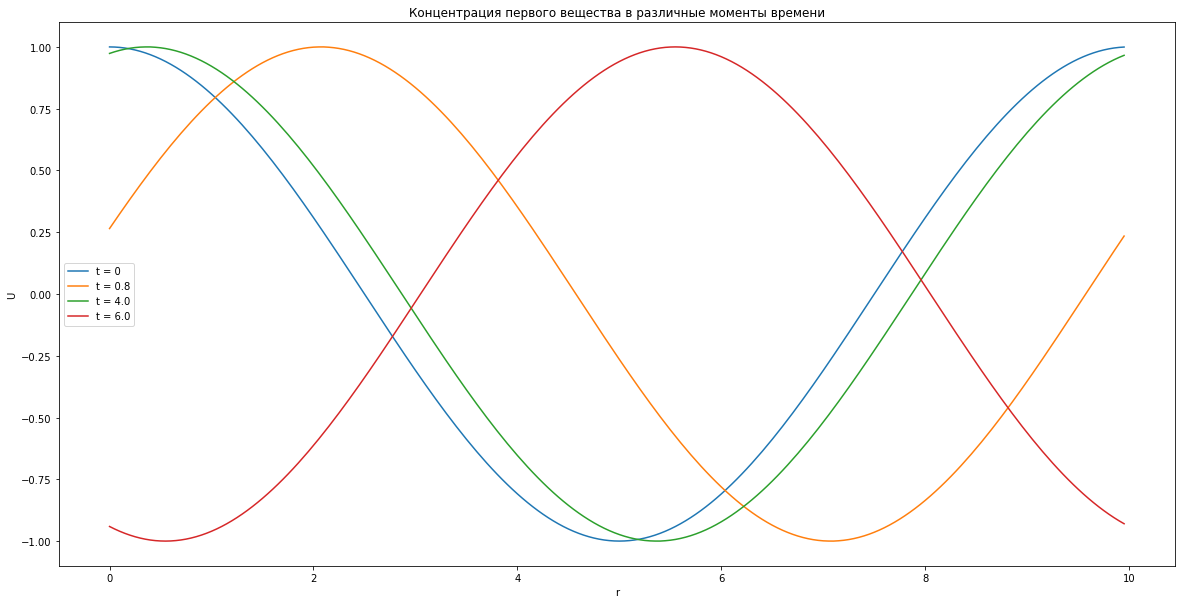

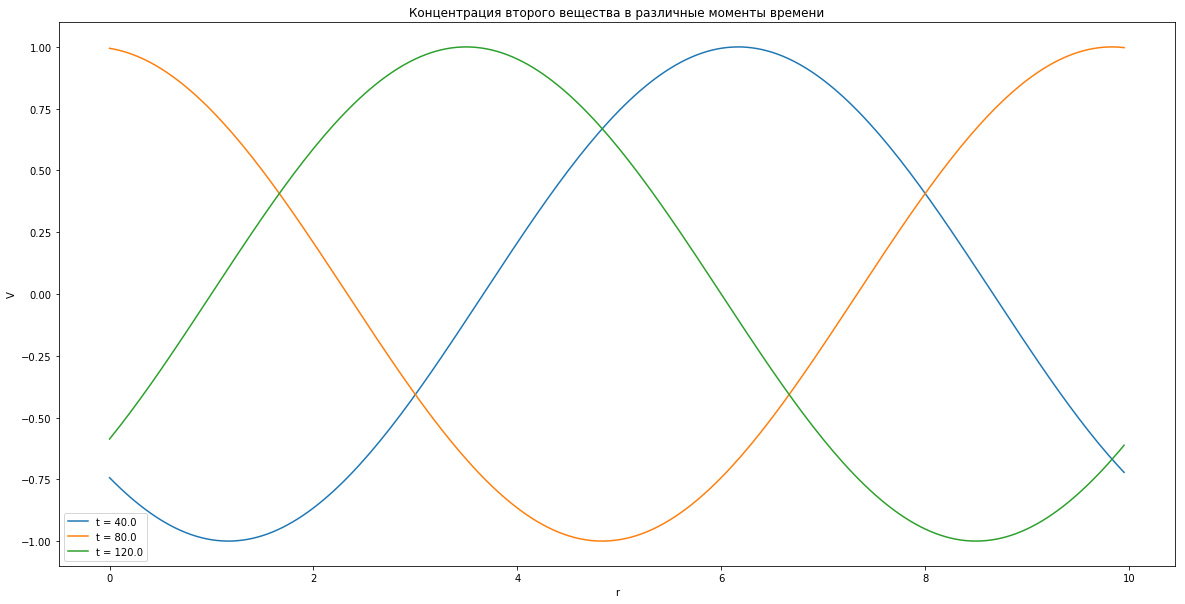

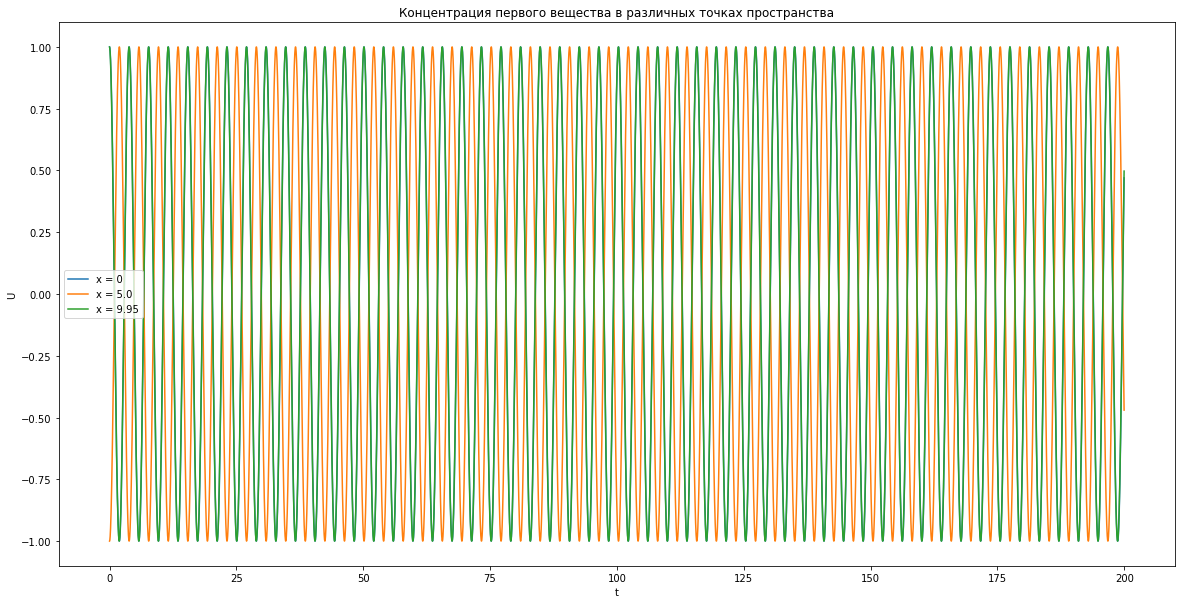

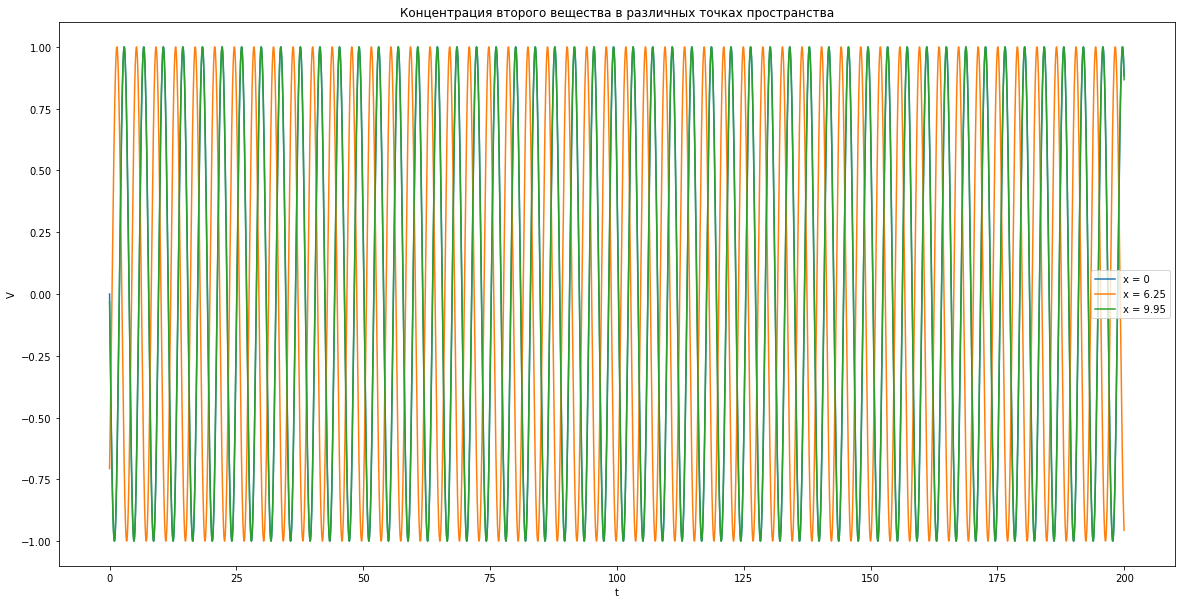

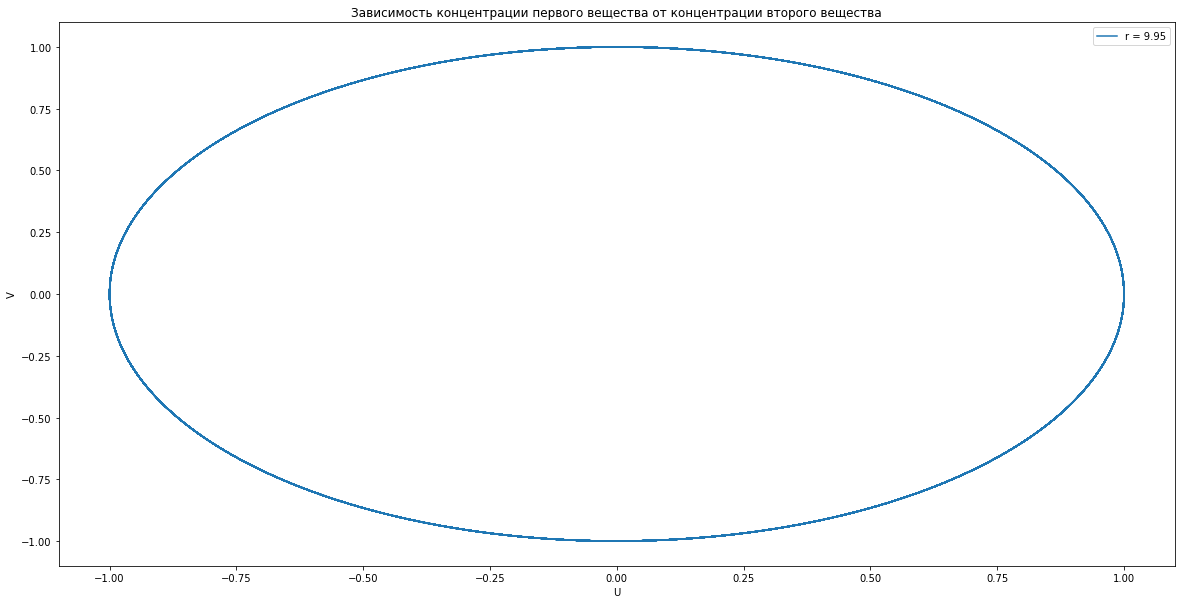

In [97]:
#plt.figure(figsize = (20,10))
#for i in (6000,):
#    plt.plot(x, a*np.ones(gridWidth), label='t = %s'%t[i])
#    plt.plot(x, (b+1)*U[:, i], label='t = %s'%t[i])
#    plt.plot(x, U[:, i]**2*V[:, i], label='t = %s'%t[i])
#    plt.plot(x, grad, label='t = %s'%t[i])
#    plt.title(u'Концентрация первого вещества в различные моменты времени')
#    plt.legend(loc = 'best')
#    plt.xlabel('r')
#    plt.ylabel('U')
#plt.show()

#plt.figure(figsize = (20,10))
#for i in (6000,):
#    plt.plot(x, b*U[:,i], label='t = %s'%t[i])
#    plt.plot(x, U[:, i]**2*V[:, i], label='t = %s'%t[i])
#    plt.plot(x, grad1, label='t = %s'%t[i])
#    plt.title(u'Концентрация первого вещества в различные моменты времени')
#    plt.legend(loc = 'best')
#    plt.xlabel('r')
#    plt.ylabel('U')
#plt.show()

plt.figure(figsize = (20,10))
for i in (0,40,  200, 300):
    plt.plot(x, U[:, i], label='t = %s'%t[i])
    plt.title(u'Концентрация первого вещества в различные моменты времени')
    plt.legend(loc = 'best')
    plt.xlabel('r')
    plt.ylabel('U')
plt.show()

plt.figure(figsize = (20,10))
for i in (2000, 4000, 6000):
    plt.plot(x, V[:, i], label='t = %s'%t[i])
    plt.title(u'Концентрация второго вещества в различные моменты времени')
    plt.legend(loc = 'best')
    plt.xlabel('r')
    plt.ylabel('V')
plt.show()

plt.figure(figsize = (20,10))
for i in (0,100, 199):
    plt.plot(t, U[i, :], label='x = %s'%x[i])
    plt.title(u'Концентрация первого вещества в различных точках пространства')
    plt.legend(loc = 'best')
    plt.xlabel('t')
    plt.ylabel('U')
plt.show()

plt.figure(figsize = (20,10))
for i in (0, 125, 199):
    plt.plot(t, V[i, :], label='x = %s'%x[i])
    plt.title(u'Концентрация второго вещества в различных точках пространства')
    plt.legend(loc = 'best')
    plt.xlabel('t')
    plt.ylabel('V')
plt.show()

plt.figure(figsize = (20,10))
for i in (199,):
    plt.plot(U[i,4000:], V[i,4000:], label='r = %s'%x[i])
    plt.title(u'Зависимость концентрации первого вещества от концентрации второго вещества')
    plt.legend(loc = 'best')
    plt.xlabel('U')
    plt.ylabel('V')
plt.show()

In [96]:
for i in range(gridWidth):
    if U[i,0] == U[:,0].max():
        x_1 = x[i]
    if U[i,40] == U[:,40].max():
        x_2 = x[i]
        
c_new = (x_2 - x_1)/(40*tau)
c_new

2.6250000000000004

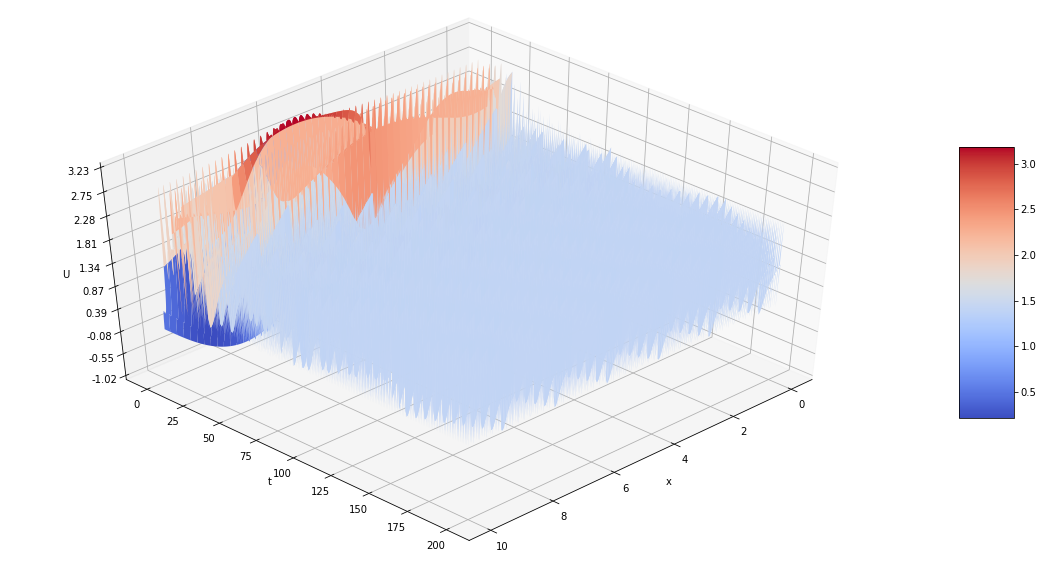

In [262]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,10))
ax = fig.gca(projection='3d')

X, T = np.meshgrid(x,t)

surf = ax.plot_surface(X, T, np.array(V.T), cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U')
ax.azim = 45
ax.elev = 45
plt.show()